# Introduction 

This project is part of the Data Science Foundations Portfolio from Codecademy DS Path. It is not part of any real-life project and conclusions are my own, based on the data analysis performed.


### Data

For this project, two datasets have been provided. The first csv file contains information about each species and the other collected observations / sightings of species and the park locations where they occured. 

### Goal

The National Parks Services collects data about endangered species in different parks. I will perform some data analysis on the conservation statuses of these species and try to find patterns or themes to the types of species that become endagered and other meaningful insights. The main questions are:

- What is the distribution of conservation status by category?
- Is there any category more likely to be endangered than others?
- What is the distribution of observations by park and by category?
- What is the distribution of observations by conservation status and by category?

# Import Python modules

In [118]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Data


First, I will load the csv files into 2 dataframes and describe each variable:

In [119]:
species = pd.read_csv("species_info.csv", encoding='utf-8')

In [120]:
observations = pd.read_csv("observations.csv", encoding='utf-8')

In [121]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [122]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


The data set "species" has the following columns:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

The data set observations has the following columns:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

# Data description

### Species data
First, let's start with some basic exploration of the species data set.

In [123]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Canis lupus,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


**Unique categories**

In [124]:
list(species.category.unique())

['Mammal',
 'Bird',
 'Reptile',
 'Amphibian',
 'Fish',
 'Vascular Plant',
 'Nonvascular Plant']

**Count of each category**

In [125]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

**Unique conservation status**

In [126]:
list(species.conservation_status.unique())


[nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']

**Count of each conservation status**

In [127]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [128]:
conservation_concern_obs = species.groupby("conservation_status").size().sum()
conservation_concern_obs

191

**Count of non-concern species**

In [129]:
no_concern_obs = species.conservation_status.isna().sum()
no_concern_obs

5633

In this table we can see:
- There're 5824 observations
- There's a total of 7 taxonomy categories: Mammal, Bird, Reptible, Amphibian, Fish, Vascular Plant and Nonvascular Plant
- There's a total of 4 conservation status: Species of Concern, Endangered, Threatened and In Recovery. There's also "nan" value that refers to those observations without any conservation status (Structurally missing data). This means that there's a total of 191 observations with some level of conservation concern and 5633 that do not belong to a conservation concern category. 

Let's look for any other missing data onother variables:

In [130]:
species.common_names.isna().sum()

0

In [131]:
species.scientific_name.isna().sum()

0

In [132]:
species.category.isna().sum()

0

No data seems to be missing. 
On the other hand, for now, column and value names seem consistent and convinient to use for analysis so I will not apply any changes.

### Observations data

Let's now check explore the observations data set

In [133]:
len(observations)

23296

In [134]:
observations.groupby("park_name").count()

,scientific_name,observations
park_name,,
Bryce National Park,5824,5824
Great Smoky Mountains National Park,5824,5824
Yellowstone National Park,5824,5824
Yosemite National Park,5824,5824


In [135]:
unique_species_seen = len(observations) / len(observations.park_name.unique())
unique_species_seen

5824.0

There's a total of 3314739 actual observations. These correspond to 5824 different species seen in the last 7 days in 4 different parks: Bryce National Park, Great Smoky Mountains National Park, Yellowstone National Park and Yosemite National Park	. 

Let's double-check there are no null values:

In [136]:
observations.scientific_name.isna().sum()

0

In [137]:
observations.park_name.isna().sum()

0

In [138]:
observations.observations.isna().sum()

0

No data seems to be missing. 
Column and value names seem consistent and convinient to use for analysis so I will not apply any changes.

# Analysis

## Conservation status

Let's start answering a basic question about **species** data: 
- **What is the percentage of species in some type of conservation danger?**
- **What is the distribution of the different levels of conservation concern?**

First, let's create 2 groups on this dataframe: Protected and Not protected. For this, we will include one more column to the dataset and add the correct value (Protected, Not protected) based on the conservation_status column:

In [139]:
species["is_protected"] = np.where(species["conservation_status"].isna(), "Not protected", "Protected")

In [140]:
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Not protected
1,Mammal,Bos bison,"American Bison, Bison",NaN,Not protected
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Not protected
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,Not protected
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,Not protected
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN,Not protected
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN,Not protected
7,Mammal,Canis latrans,Coyote,Species of Concern,Protected
8,Mammal,Canis lupus,Gray Wolf,Endangered,Protected
9,Mammal,Canis rufus,Red Wolf,Endangered,Protected


Now, let's plot the results:

In [141]:
is_protected_distribution = species.groupby("is_protected").category.count()
is_protected_distribution

is_protected
Not protected    5633
Protected         191
Name: category, dtype: int64

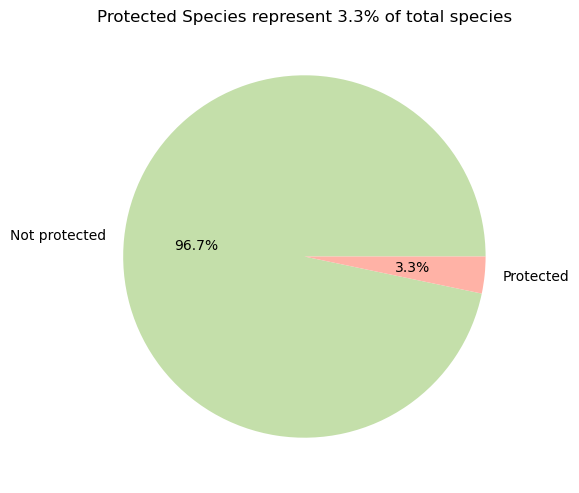

<Figure size 432x288 with 0 Axes>

In [142]:
is_protected_distribution_labels = ["Not protected", "Protected"]
is_protected_distribution_colors = ["#C4DFAA", "#FFB2A6"]

plt.figure(figsize=(8, 6), dpi=100)
plt.pie(is_protected_distribution, labels = is_protected_distribution_labels, autopct='%1.1f%%', colors = is_protected_distribution_colors)
plt.title("Protected Species represent 3.3% of total species")
plt.show()
plt.clf()


**From those protected, what is the general distribution?**

In [143]:
conservation_level_distribution = species.groupby("conservation_status").category.count()
conservation_level_distribution

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
Name: category, dtype: int64

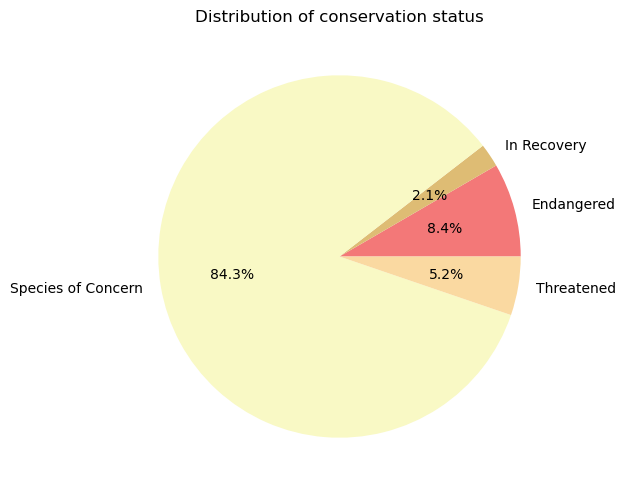

<Figure size 432x288 with 0 Axes>

In [144]:
status_distribution_labels = ["Endangered", "In Recovery", "Species of Concern", "Threatened"]
status_colors = ["#F37878", "#DEBC74","#F9F9C5","#FAD9A1"]

plt.figure(figsize=(8, 6), dpi=100)
plt.pie(conservation_level_distribution, labels = status_distribution_labels, autopct='%1.1f%%', colors = status_colors)
plt.title("Distribution of conservation status")
plt.show()
plt.clf()

## Conservation status by category

Now, let's check the **distribution of conservation status by category**

In [145]:
conservation_status_by_category = species[species.conservation_status != "Not protected"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
conservation_status_by_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


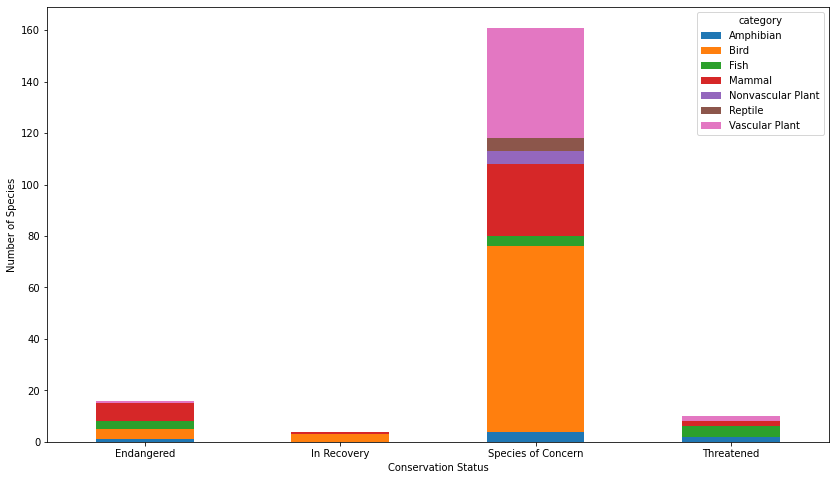

<Figure size 432x288 with 0 Axes>

In [146]:
ax = conservation_status_by_category.plot(kind = 'bar', figsize=(14,8), stacked=True)
plt.xticks(rotation = 0)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show()
plt.clf()


- Most of the species (84,3%) are not protected
- From the ones protected, most of them are in the category "Species of Concern". 
- About the distribution, Mammals is the most common category in the Endangered group, while Bird is the most common cateroy in the group "Species of Concern". 

Now let's check, by category, **the percentage of species in the "Protected" category**

In [147]:
is_protected_by_category = species.groupby(["category","is_protected"])['scientific_name'].count().unstack()
is_protected_by_category["Totals"] = is_protected_by_category["Not protected"] + is_protected_by_category["Protected"]
is_protected_by_category["Percentage of Protected"] = np.round((is_protected_by_category["Protected"] / is_protected_by_category["Totals"]) * 100, 2)
is_protected_by_category

is_protected,Not protected,Protected,Totals,Percentage of Protected
category,,,,
Amphibian,73,7,80,8.75
Bird,442,79,521,15.16
Fish,116,11,127,8.66
Mammal,176,38,214,17.76
Nonvascular Plant,328,5,333,1.50
Reptile,74,5,79,6.33
Vascular Plant,4424,46,4470,1.03


Mammals and Fish are the categories with a higher percentage of Protected species. **Is Mammal likelihood of being protected (17.76%) significally higher than Fish (15.16%)**. Let's run a chi squared test to answer this question.

In [148]:
from scipy.stats import chi2_contingency

In [149]:
contingency_mammal_bird = species[(species["category"] == "Bird") | (species["category"] == "Mammal") ].groupby(["category", "is_protected"])['scientific_name'].count().unstack()
contingency_mammal_bird

is_protected,Not protected,Protected
category,,
Bird,442,79
Mammal,176,38


In [150]:
contingency_mammal_bird_array = np.array(contingency_mammal_bird)
contingency_mammal_bird_array

array([[442,  79],
       [176,  38]])

In [151]:
chi2_contingency(contingency_mammal_bird_array)

(0.5810483277947567,
 0.445901703047197,
 1,
 array([[438.06530612,  82.93469388],
        [179.93469388,  34.06530612]]))

The chi-squared test returns a p-value of 0.45.  In this case, the p-value is much higher than a standard significance threshold of 5% (0.45 > 0.05), and this tell us the variables are independent therefore, there's no significant difference in protected percentage between mammals and birds.

Let's see if there's a significant difference with another group, Fish (8.66%). 

In [152]:
contingency_mammal_fish = species[(species["category"] == "Fish") | (species["category"] == "Mammal") ].groupby(["category", "is_protected"])['scientific_name'].count().unstack()
contingency_mammal_fish

is_protected,Not protected,Protected
category,,
Fish,116,11
Mammal,176,38


In [153]:
contingency_mammal_fish_array = np.array(contingency_mammal_fish)
contingency_mammal_fish_array

array([[116,  11],
       [176,  38]])

In [154]:
chi2_contingency(contingency_mammal_fish_array)

(4.644937895246063,
 0.031145264082780604,
 1,
 array([[108.75073314,  18.24926686],
        [183.24926686,  30.75073314]]))

The chi-squared test returns a p-value of 0.03. In this case, the p-value is lower than 0.05, and this tell us the variables are not independent therefore, there's a significant difference in protected percentage between Mammals and Fish.

## Observations by Park and by Category

Now, let's take a look at the observations of species in different parks. To ease the analysis, first I will merge the observations table with the species table using "scientific_name" as common column.

In [155]:
species_observations = observations.merge(species)
species_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,Not protected
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,Not protected
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,Not protected
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,Not protected
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN,Not protected
...,...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,NaN,Not protected
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN,Not protected
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN,Not protected
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN,Not protected


Next, I will create a data set with the number of species by park and by category to see how they are distributed. 

In [156]:
category_by_park = species_observations.groupby(["park_name", "category"])['observations'].sum().unstack()
category_by_park

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7542,58590,12823,28830,32992,8141,484373
Great Smoky Mountains National Park,5876,42869,9482,21056,24857,5841,364882
Yellowstone National Park,19937,144300,31459,70701,83021,20061,1218162
Yosemite National Park,11713,86612,19137,42533,49783,11779,727895


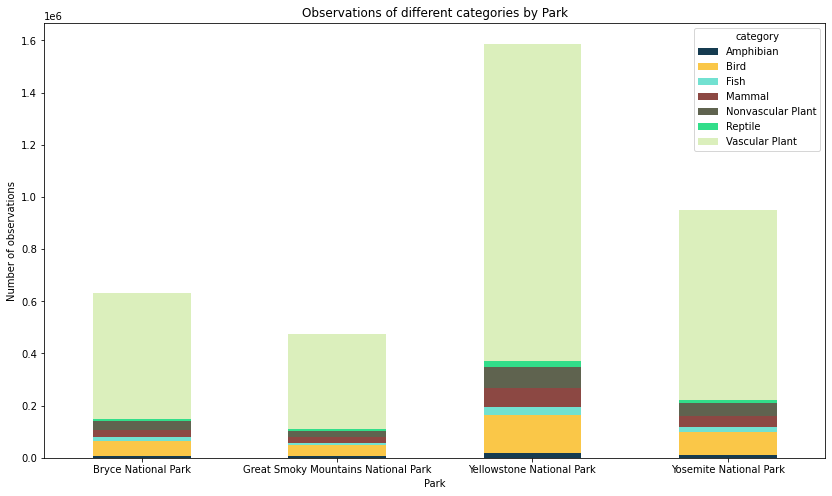

<Figure size 432x288 with 0 Axes>

In [157]:
ax = category_by_park.plot(kind = 'bar', figsize=(14,8), stacked=True, color = ["#153B50", "#FAC748", "#72E1D1", "#8C4843", "#5F634F", "#32DE8A" , "#DBEFBC"] )
plt.xticks(rotation = 0)
ax.set_xlabel("Park")
ax.set_ylabel("Number of observations")
plt.title("Observations of different categories by Park")
plt.show()
plt.clf()

Since Vascular plants observations are the most common type of observation by far, let's check  the distribution by category differentiating Plants and Animals to get a better view on both groups.

In [158]:
category_by_park_animals = species_observations[(species_observations.category != "Vascular Plant") & (species_observations.category != "Nonvascular Plant")]
category_by_park_plants = species_observations[(species_observations.category == "Vascular Plant") | (species_observations.category == "Nonvascular Plant")]

In [159]:
plants_by_park = category_by_park_plants.groupby(["park_name", "category"])['observations'].sum().unstack()
animals_by_park = category_by_park_animals.groupby(["park_name", "category"])['observations'].sum().unstack()

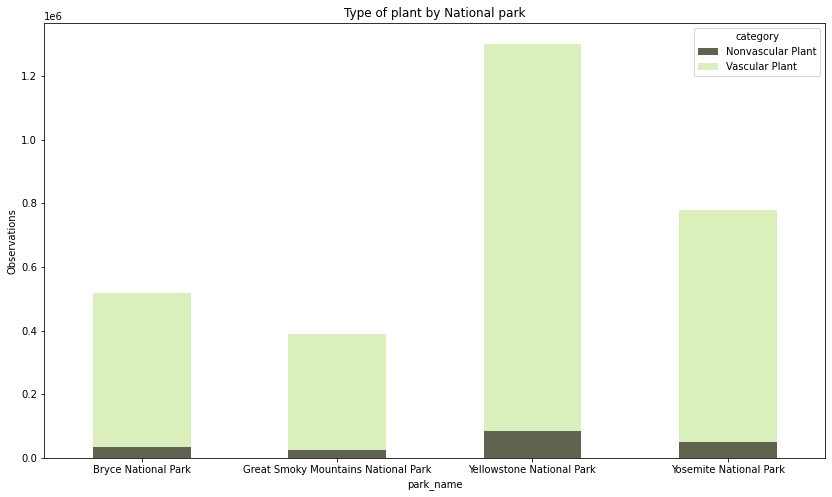

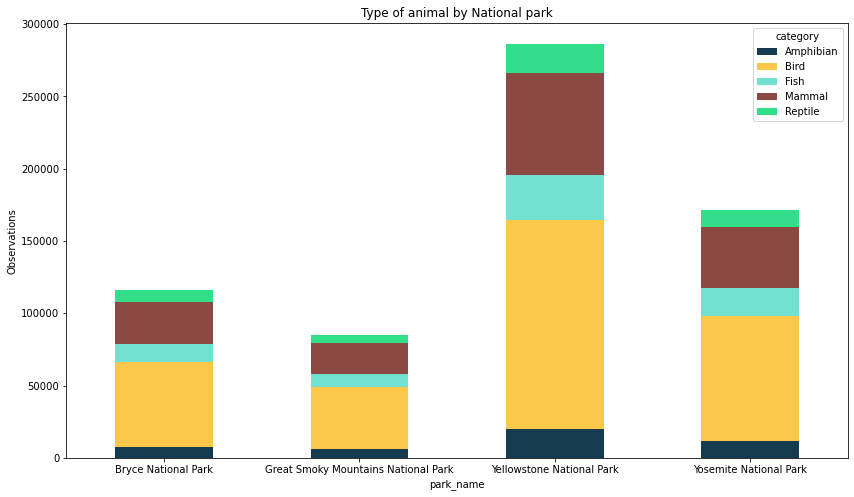

<Figure size 432x288 with 0 Axes>

In [160]:
ax1 = plants_by_park.plot(kind = 'bar', figsize=(14,8), stacked=True, color = ["#5F634F", "#DBEFBC"])
plt.xticks(rotation = 0)
plt.title("Type of plant by National park")
ax2 = animals_by_park.plot(kind = 'bar', figsize=(14,8), stacked=True, color = ["#153B50", "#FAC748", "#72E1D1", "#8C4843", "#32DE8A"])
plt.xticks(rotation = 0)
plt.title("Type of animal by National park")
ax1.set_ylabel("Observations")
ax2.set_ylabel("Observations")
plt.show()
plt.clf()

- Yellowstone has the highest number of observations.
- Among plants, Vascular plants are the most common observation in all parks.
- Among Animals, Birds are the most common observation in all parks, followed by Mammals. 

## Conservation status by Park and by Category

Now let's analyse if there's any relation between the conservation status and the percentage of observations.

In [161]:
is_protected_observations_distribution = species_observations.groupby("is_protected").observations.sum()
is_protected_observations_distribution

is_protected
Not protected    3542326
Protected         102921
Name: observations, dtype: int64

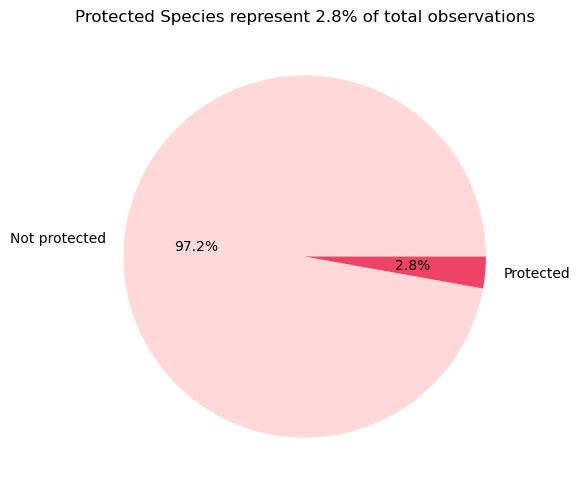

<Figure size 432x288 with 0 Axes>

In [162]:
is_protected_observations_distribution = species_observations.groupby("is_protected").observations.sum()

is_protected_obsertavations_labels = ["Not protected", "Protected"]
is_protected_obsertavations_colors = ["#FFD9DA", "#EE4266"]

plt.figure(figsize=(8, 6), dpi=100)
plt.pie(is_protected_observations_distribution, labels = is_protected_obsertavations_labels, autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Protected Species represent 2.8% of total observations")
plt.show()
plt.clf()

While **protected species represent the 3.3% of all listed species**, they represent the **2.8% of all actual observations**, which means that they are observed less often than their actual representation. 

Let's get the same **distribution by Park**:

In [163]:
bryce_observations = species_observations[species_observations.park_name == "Bryce National Park"].groupby("is_protected").sum()
greatsmoky_observations = species_observations[species_observations.park_name  == "Great Smoky Mountains National Park"].groupby("is_protected").sum()
yellowtone_observations = species_observations[species_observations.park_name  == "Yellowstone National Park"].groupby("is_protected").sum()
yosemite_observations = species_observations[species_observations.park_name  == "Yosemite National Park"].groupby("is_protected").sum()


bryce_observations.reset_index(inplace = True)
greatsmoky_observations.reset_index(inplace = True)
yellowtone_observations.reset_index(inplace = True)
yosemite_observations.reset_index(inplace = True)



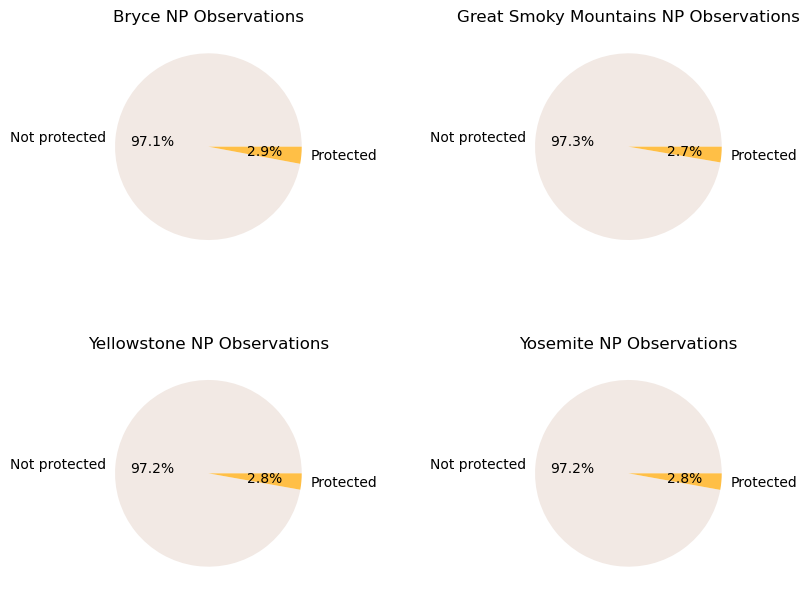

<Figure size 432x288 with 0 Axes>

In [164]:
is_protected_obsertavations_labels = ["Not protected", "Protected"]
is_protected_obsertavations_colors = ["#F2E9E4", "#FFBF46"]

plt.figure(figsize=(12, 8), dpi=100)

ax1 = plt.subplot(2,2,1)
plt.pie(bryce_observations["observations"], labels = is_protected_obsertavations_labels,  autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Bryce NP Observations")

ax2 = plt.subplot(2,2,2)
plt.pie(greatsmoky_observations["observations"], labels = is_protected_obsertavations_labels,  autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Great Smoky Mountains NP Observations")

ax3 = plt.subplot(2,2,3)
plt.pie(yellowtone_observations["observations"], labels = is_protected_obsertavations_labels,  autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Yellowstone NP Observations")

ax4 = plt.subplot(2,2,4)
plt.pie(yosemite_observations["observations"], labels = is_protected_obsertavations_labels,  autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Yosemite NP Observations")



plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.7, 
                    top=1,
                    wspace=0.4, 
                    hspace=0.4)

plt.show()
plt.clf()

The distrubution of observations protected vs not-protected is similar between parks. 

Now, let's check if there's difference in **distribution on type of observation (Protected vs. Not protected) by category of species**:

In [165]:
observations_is_protected_by_category = species_observations.groupby(["category","is_protected"])['scientific_name'].count().unstack()
observations_is_protected_by_category["Totals P/Non-P"] = observations_is_protected_by_category["Not protected"] + observations_is_protected_by_category["Protected"]
observations_is_protected_by_category["% Protected"] = np.round((observations_is_protected_by_category["Protected"] / observations_is_protected_by_category["Totals P/Non-P"]) * 100, 2)
observations_is_protected_by_category["% of Not Protected"] = np.round((observations_is_protected_by_category["Not protected"] / observations_is_protected_by_category["Totals P/Non-P"]) * 100, 2)

observations_is_protected_by_category["Obs of protected"] =  species_observations[species_observations.is_protected == "Protected"].groupby("category")['observations'].sum()
observations_is_protected_by_category["Obs of non-protected"] = species_observations[species_observations.is_protected == "Not protected"].groupby("category")['observations'].sum()


observations_is_protected_by_category["Total Obs"] = observations_is_protected_by_category["Obs of protected"] + observations_is_protected_by_category["Obs of non-protected"]
observations_is_protected_by_category["% Obs Protected"] = np.round((observations_is_protected_by_category["Obs of protected"] / observations_is_protected_by_category["Total Obs"]) * 100, 2)
observations_is_protected_by_category["% Obs of Not Protected"] = np.round((observations_is_protected_by_category["Obs of non-protected"] / observations_is_protected_by_category["Total Obs"]) * 100, 2)


observations_is_protected_by_category.sort_values(by=["% of Not Protected"])






is_protected,Not protected,Protected,Totals P/Non-P,% Protected,% of Not Protected,Obs of protected,Obs of non-protected,Total Obs,% Obs Protected,% Obs of Not Protected
category,,,,,,,,,,
Mammal,968,232,1200,19.33,80.67,25146,137974,163120,15.42,84.58
Bird,2016,348,2364,14.72,85.28,42724,289647,332371,12.85,87.15
Fish,476,48,524,9.16,90.84,4209,68692,72901,5.77,94.23
Amphibian,300,28,328,8.54,91.46,2752,42316,45068,6.11,93.89
Reptile,304,20,324,6.17,93.83,2536,43286,45822,5.53,94.47
Nonvascular Plant,1312,20,1332,1.50,98.50,2705,187948,190653,1.42,98.58
Vascular Plant,19376,184,19560,0.94,99.06,22849,2772463,2795312,0.82,99.18


With this table we can see that Vascular Plants (the most frequent category) were affecting the global percentage quite a lot (where protected species represented only de 2.8% of the total observations). Looking more in detail we see how in all categories the % of observations of protected species is lower than their actual representation but the distribution varies quite a lot depending on the category. 

Let's visualize in pie charts, side by side, **the distribution of conservation status counts (number of species) and the destribution of conservation status observations by category**. 

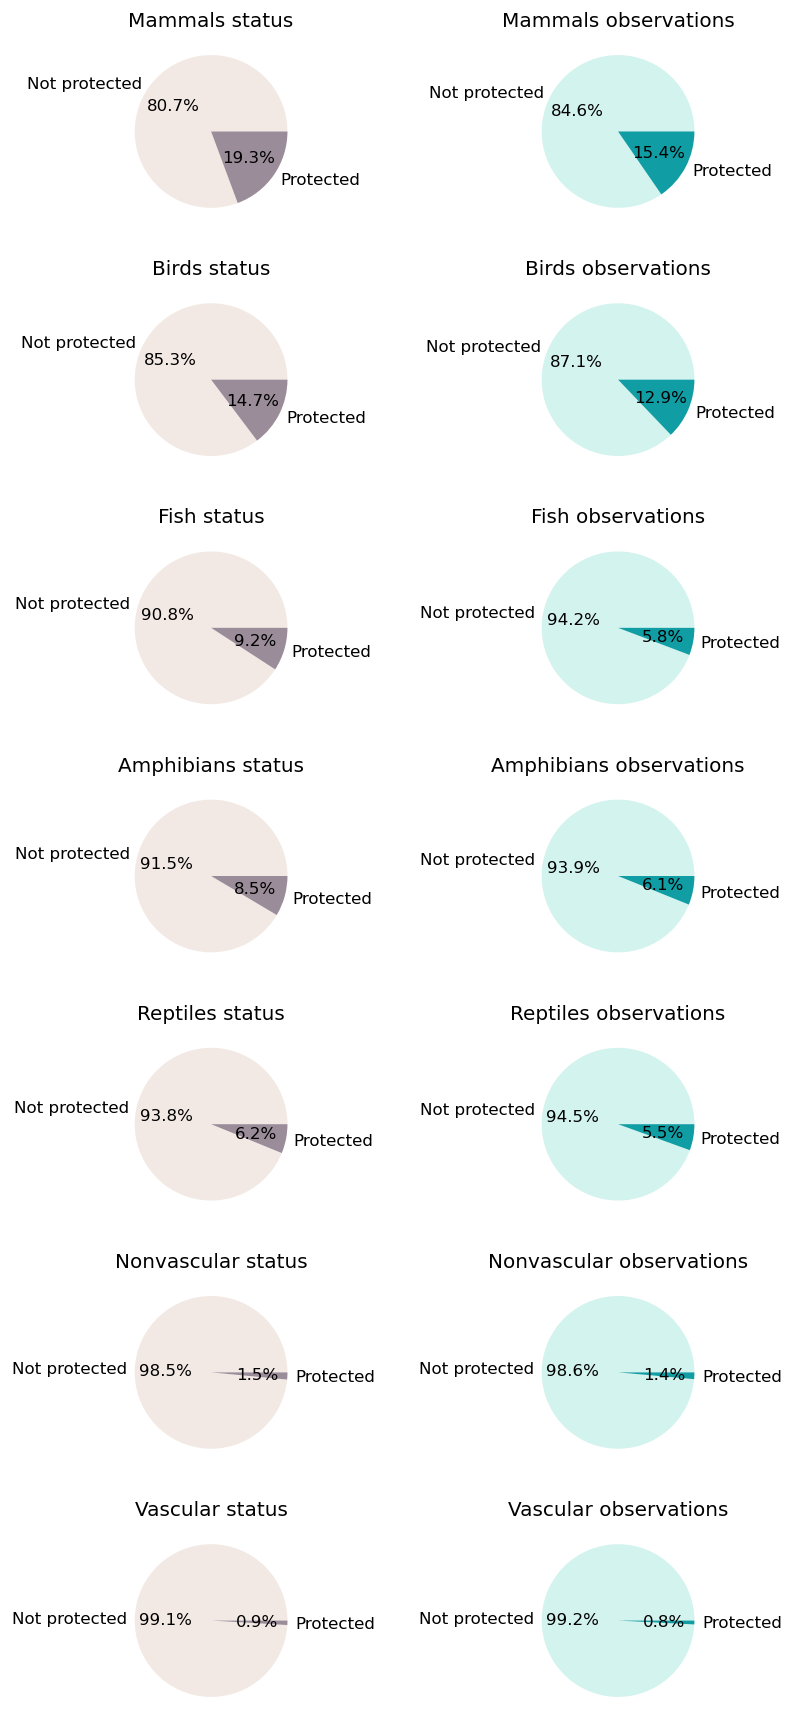

<Figure size 432x288 with 0 Axes>

In [166]:
is_protected_obsertavations_labels = ["Not protected", "Protected"]
is_protected_obsertavations_colors = ["#D3F3EE", "#119DA4"]
is_protected_status_labels = ["Not protected", "Protected"]
is_protected_status_colors = ["#F2E9E4", "#9A8C98"]

plt.figure(figsize=(15, 10), dpi=120)

ax1 = plt.subplot(7,2,1)
plt.pie(mammals_status["observations"], labels = is_protected_status_labels,  autopct='%1.1f%%', pctdistance=0.6, colors = is_protected_status_colors)
plt.title("Mammals status")

ax2 = plt.subplot(7,2,2)
plt.pie(mammals_observations["observations"], labels = is_protected_obsertavations_labels,  autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Mammals observations")


ax3 = plt.subplot(7,2,3)
plt.pie(bird_status["observations"], labels = is_protected_status_labels,  autopct='%1.1f%%', colors = is_protected_status_colors)
plt.title("Birds status")

ax4 = plt.subplot(7,2,4)
plt.pie(bird_observations["observations"], labels = is_protected_obsertavations_labels,  autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Birds observations")



ax5 = plt.subplot(7,2,5)
plt.pie(fish_status["observations"], labels = is_protected_status_labels,  autopct='%1.1f%%', colors = is_protected_status_colors)
plt.title("Fish status")

ax6 = plt.subplot(7,2,6)
plt.pie(fish_observations["observations"], labels = is_protected_obsertavations_labels,  autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Fish observations")



ax7 = plt.subplot(7,2,7)
plt.pie(amphibian_status["observations"], labels = is_protected_status_labels,  autopct='%1.1f%%', colors = is_protected_status_colors)
plt.title("Amphibians status")

ax8 = plt.subplot(7,2,8)
plt.pie(amphibian_observations["observations"], labels = is_protected_obsertavations_labels,  autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Amphibians observations")



ax9 = plt.subplot(7,2,9)
plt.pie(reptile_status["observations"], labels = is_protected_status_labels,  autopct='%1.1f%%', colors = is_protected_status_colors)
plt.title("Reptiles status")

ax10 = plt.subplot(7,2,10)
plt.pie(reptile_observations["observations"], labels = is_protected_obsertavations_labels,  autopct='%1.1f%%', colors = is_protected_obsertavations_colors)
plt.title("Reptiles observations")



ax11 = plt.subplot(7,2,11)
plt.pie(nonvascular_status["observations"], labels = is_protected_status_labels, autopct='%1.1f%%', colors = is_protected_status_colors, normalize=True)
plt.title("Nonvascular status")

ax12 = plt.subplot(7,2,12)
plt.pie(nonvascular_observations["observations"], labels = is_protected_obsertavations_labels, autopct='%1.1f%%', colors = is_protected_obsertavations_colors, normalize=True)
plt.title("Nonvascular observations")



ax13 = plt.subplot(7,2,13)
plt.pie(vascular_status["observations"], labels = is_protected_status_labels, autopct='%1.1f%%', colors = is_protected_status_colors, normalize=True )
plt.title("Vascular status")

ax14 = plt.subplot(7,2,14)
plt.pie(vascular_observations["observations"], labels = is_protected_obsertavations_labels, autopct='%1.1f%%', colors = is_protected_obsertavations_colors, normalize=True )
plt.title("Vascular observations")




plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.5, 
                    top=1.5, 
                    wspace=0.3, 
                    hspace=0.3)

plt.show()
plt.clf()

